# Practical 3

In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data = pd.read_csv('./datasets/Telcom_Customer_Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [75]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [77]:
data = df.drop_duplicates()

In [78]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [79]:
# Get unique values for each column
#dict = {key : val}
unique_values = {col : df[col].unique() for col in df.columns}

# Display unique values
for column, values in unique_values.items():
    print(f"Unique values in '{column}': {values}")

Unique values in 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in 'gender': ['Female' 'Male']
Unique values in 'SeniorCitizen': [0 1]
Unique values in 'Partner': ['Yes' 'No']
Unique values in 'Dependents': ['No' 'Yes']
Unique values in 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in 'PhoneService': ['No' 'Yes']
Unique values in 'MultipleLines': ['No phone service' 'No' 'Yes']
Unique values in 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique values in 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Unique values in 'OnlineBackup': ['Yes' 'No' 'No internet service']
Unique values in 'DeviceProtection': ['No' 'Yes' 'No internet service']
Unique values in 'TechSupport': ['No' 'Yes' 'No internet service']
Unique valu

In [94]:
column_to_map = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'TotalCharges']
mapping = {'No phone service' : 'No',
           'No' : 'No',
           'Yes' : 'Yes',
        'No internet service' : 'No',
           ' ' : '0'
          }

for col in column_to_map:
    data[col] = data[col].replace(mapping)

In [95]:
# Get unique values for each column
unique_values = {col: data[col].unique() for col in data.columns}

# Display unique values
for column, values in unique_values.items():
    print(f"Unique values in '{column}': {values}")

Unique values in 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in 'gender': [0 1]
Unique values in 'SeniorCitizen': [0 1]
Unique values in 'Partner': [1 0]
Unique values in 'Dependents': [0 1]
Unique values in 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in 'PhoneService': [0 1]
Unique values in 'MultipleLines': [0 1]
Unique values in 'InternetService': [0 1 2]
Unique values in 'OnlineSecurity': [0 1]
Unique values in 'OnlineBackup': [1 0]
Unique values in 'DeviceProtection': [0 1]
Unique values in 'TechSupport': [0 1]
Unique values in 'StreamingTV': [0 1]
Unique values in 'StreamingMovies': [0 1]
Unique values in 'Contract': [0 1 2]
Unique values in 'PaperlessBilling': [1 0]
Unique values in 'PaymentMethod': [2 3 0 1]
U

In [96]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [97]:
encode_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

encoder = LabelEncoder()

for col in encode_cols:
    data[col] = encoder.fit_transform(data[col])

In [98]:
# Get unique values for each column
unique_values = {col: data[col].unique() for col in data.columns}

# Display unique values
for column, values in unique_values.items():
    print(f"Unique values in '{column}': {values}")

Unique values in 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in 'gender': [0 1]
Unique values in 'SeniorCitizen': [0 1]
Unique values in 'Partner': [1 0]
Unique values in 'Dependents': [0 1]
Unique values in 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in 'PhoneService': [0 1]
Unique values in 'MultipleLines': [0 1]
Unique values in 'InternetService': [0 1 2]
Unique values in 'OnlineSecurity': [0 1]
Unique values in 'OnlineBackup': [1 0]
Unique values in 'DeviceProtection': [0 1]
Unique values in 'TechSupport': [0 1]
Unique values in 'StreamingTV': [0 1]
Unique values in 'StreamingMovies': [0 1]
Unique values in 'Contract': [0 1 2]
Unique values in 'PaperlessBilling': [1 0]
Unique values in 'PaymentMethod': [2 3 0 1]
U

In [99]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [100]:
# Get unique values for each column
unique_values = {col: data[col].unique() for col in data.columns}

# Display unique values
for column, values in unique_values.items():
    print(f"Unique values in '{column}': {values}")


Unique values in 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in 'gender': [0 1]
Unique values in 'SeniorCitizen': [0 1]
Unique values in 'Partner': [1 0]
Unique values in 'Dependents': [0 1]
Unique values in 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in 'PhoneService': [0 1]
Unique values in 'MultipleLines': [0 1]
Unique values in 'InternetService': [0 1 2]
Unique values in 'OnlineSecurity': [0 1]
Unique values in 'OnlineBackup': [1 0]
Unique values in 'DeviceProtection': [0 1]
Unique values in 'TechSupport': [0 1]
Unique values in 'StreamingTV': [0 1]
Unique values in 'StreamingMovies': [0 1]
Unique values in 'Contract': [0 1 2]
Unique values in 'PaperlessBilling': [1 0]
Unique values in 'PaymentMethod': [2 3 0 1]
U

In [102]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.872923,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,1.574329,64.761692,2279.734304,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.737796,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.068104,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,398.550000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [111]:
data.drop(columns = 'customerID', inplace = True)

In [112]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


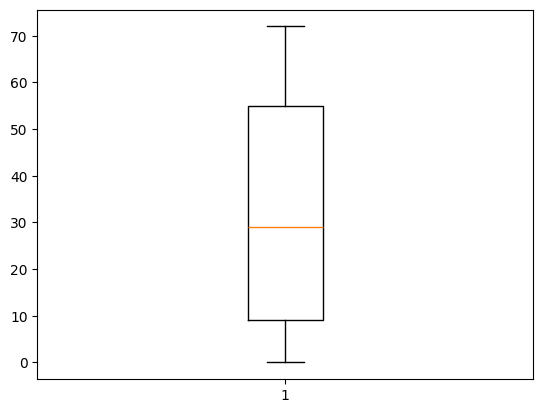

In [119]:
plt.boxplot(data['tenure'])
plt.show()

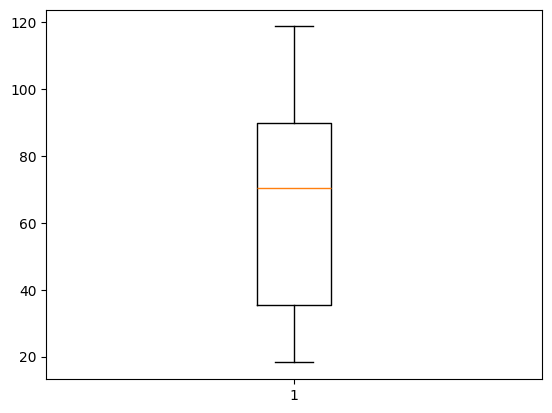

In [120]:
plt.boxplot(data['MonthlyCharges'])
plt.show()

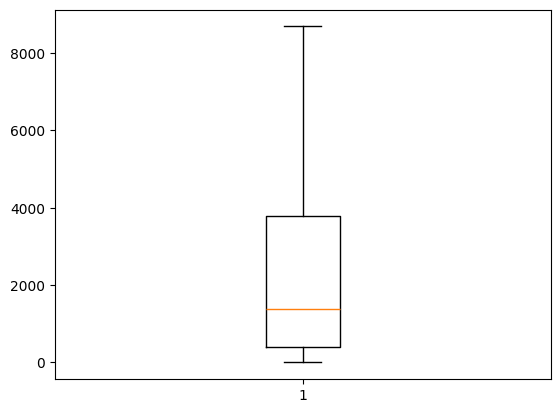

In [121]:
plt.boxplot(data['TotalCharges'])
plt.show()

In [125]:
scaler = StandardScaler()

data[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['MonthlyCharges', 'TotalCharges']])

In [126]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,-1.160323,-0.992611,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,-0.259629,-0.172165,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,-0.362660,-0.958066,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,-0.746535,-0.193672,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.938874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,0.665992,-0.127605,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,1.277533,2.242606,0
7040,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,-1.168632,-0.852932,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,0.320338,-0.870513,1


In [128]:
X = data.drop(columns = ['Churn'])
y = data['Churn']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [131]:
dataframes = [X_train, X_test, y_train, y_test]
names = ['Trainin dataa', 'Testing data', 'Training labels', 'Testing labels']

for df, file_name in zip(dataframes, names):
    df.to_csv(f"./datasets/{file_name}", index = False)

# Practical 4

In [158]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [140]:
data = pd.read_csv("./datasets/Bengaluru_House_Data.csv") 
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [141]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [137]:
columns = {col : data[col].unique() for col in data.columns}

for col, data in columns.items():
    print(col, data)

area_type ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
availability ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']
location ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'


In [143]:
data.drop(columns = ['area_type', 'society'], inplace = True)

In [146]:
data.shape

(13320, 7)

In [150]:
data.drop_duplicates(inplace = True)

In [151]:
data.dropna(subset = ['location'], inplace = True)

,availability,location,size,total_sqft,bath,balcony,price
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13314,Ready To Move,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00


In [156]:
data.rename(columns = {'size' : 'no_of_bedrooms'}, inplace = True)
data.head()

,availability,location,no_of_bedrooms,total_sqft,bath,balcony,price
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [159]:
data['no_of_bedrooms'] = data['no_of_bedrooms'].apply(lambda x: int(x.split(' ')[0]))

In [164]:
def convert_to_sqft(x):
    tokens = x.split('-')
    
    if len(tokens) == 2:
        try:
            return (float(tokens[0]) + float(tokens[1])) // 2
        except ValueError:
            return None
    try:
        return float(x)
        
    except ValueError:
        return None

In [165]:
data['total_sqft'] = data['total_sqft'].apply(convert_to_sqft)

In [167]:
data['price_per_sqft'] = (data['price'] * 100000) / data['total_sqft']

In [174]:
data.dropna(subset = ['balcony'], inplace = True)

#data.fillna(data['balcony'].mean())

In [181]:
data['total_sqft'].fillna(data['total_sqft'].mean(), inplace = True)
data['price_per_sqft'].fillna(data['price_per_sqft'].mean(), inplace = True)

In [186]:
scaler = StandardScaler()

data[['total_sqft', 'price_per_sqft']] = scaler.fit_transform(data[['total_sqft', 'price_per_sqft']])

In [187]:
data.head()

,availability,location,no_of_bedrooms,total_sqft,bath,balcony,price_per_sqft
0,19-Dec,Electronic City Phase II,2,-0.393533,2.0,1.0,-0.141122
1,Ready To Move,Chikka Tirupathi,4,0.910771,5.0,3.0,-0.101553
2,Ready To Move,Uttarahalli,3,-0.069146,2.0,3.0,-0.114943
3,Ready To Move,Lingadheeranahalli,3,-0.000721,3.0,1.0,-0.031087
4,Ready To Move,Kothanur,2,-0.271888,2.0,1.0,-0.117344


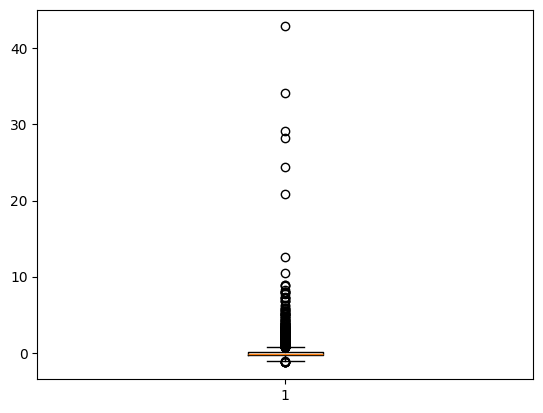

In [188]:
plt.boxplot(data['total_sqft'])
plt.show()

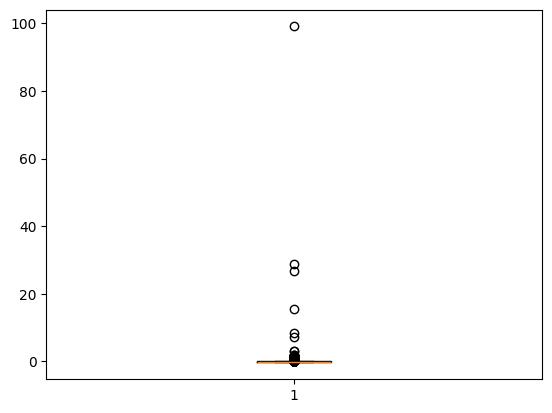

In [189]:
plt.boxplot(data['price_per_sqft'])
plt.show()

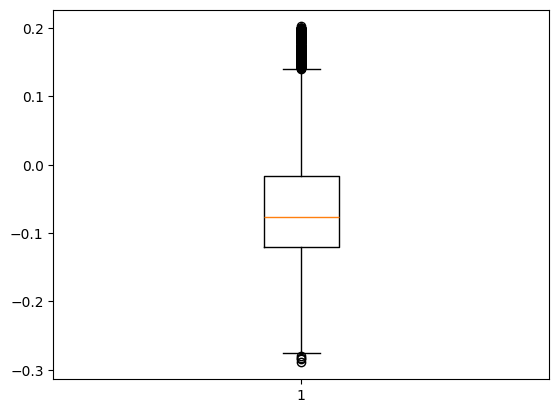

In [191]:
Q1 = np.percentile(data['price_per_sqft'], 25.) # 25th percentile of the data of the given feature 
Q3 = np.percentile(data['price_per_sqft'], 75.) # 75th percentile of the data of the given feature 
IQR = Q3-Q1 #Interquartile Range
ll = Q1 - (1.5*IQR) 
ul = Q3 + (1.5*IQR)
upper_outliers = data[data['price_per_sqft'] > ul].index.tolist() 
lower_outliers = data[data['price_per_sqft'] < ll].index.tolist() 
bad_indices = list(set(upper_outliers + lower_outliers))
drop = True 
if drop:
    data.drop(bad_indices, inplace = True, errors = 'ignore')

plt.boxplot(data['price_per_sqft']) 
plt.show()

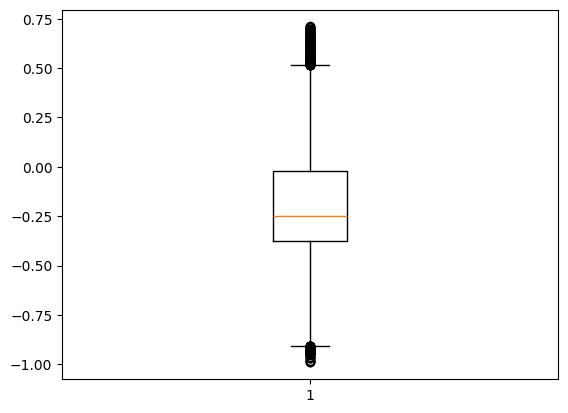

In [192]:
Q1 = np.percentile(data['total_sqft'], 25.) # 25th percentile of the data of the given feature 
Q3 = np.percentile(data['total_sqft'], 75.) # 75th percentile of the data of the given feature 
IQR = Q3-Q1 #Interquartile Range
ll = Q1 - (1.5*IQR) 
ul = Q3 + (1.5*IQR)
upper_outliers = data[data['total_sqft'] > ul].index.tolist() 
lower_outliers = data[data['total_sqft'] < ll].index.tolist() 
bad_indices = list(set(upper_outliers + lower_outliers))
drop = True 
if drop:
    data.drop(bad_indices, inplace = True, errors = 'ignore')

plt.boxplot(data['total_sqft']) 
plt.show()

In [194]:
X = data.drop(columns = ['price_per_sqft'])
y = data['price_per_sqft']

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
#export as usual

# Practical 5

In [196]:
import matplotlib.pyplot as plt
import pandas as pd

In [199]:
data = pd.read_csv("./datasets/data.csv", encoding="cp1252") 
data.head()

/var/folders/jn/vk8hw9mj7dq62tns7kzp82km0000gn/T/ipykernel_10188/4249163964.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./datasets/data.csv", encoding="cp1252")


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [207]:
data.shape

(435742, 11)

In [200]:
data.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [202]:
unique_val = {col : data[col].unique() for col in data.columns}

for col, val in unique_val.items():
    print(col, val)

stn_code [150.0 151.0 152.0 95.0 202.0 203.0 232.0 233.0 234.0 241.0 365.0 393.0
 394.0 371.0 387.0 388.0 nan 582.0 583.0 581.0 466.0 577.0 580.0 468.0
 465.0 389.0 462.0 469.0 467.0 585.0 579.0 470.0 578.0 748.0 742.0 750.0
 745.0 749.0 755.0 743.0 740.0 746.0 753.0 757.0 758.0 756.0 751.0 739.0
 584.0 752.0 741.0 787.0 788.0 193.0 194.0 195.0 218.0 217.0 242.0 520.0
 542.0 566.0 538.0 539.0 603.0 602.0 519.0 596.0 541.0 587.0 595.0 597.0
 604.0 607.0 567.0 536.0 594.0 586.0 605.0 537.0 46.0 45.0 44.0 104.0
 171.0 172.0 173.0 174.0 210.0 211.0 284.0 106.0 107.0 108.0 263.0 264.0
 463.0 464.0 249.0 364.0 407.0 65.0 67.0 245.0 368.0 223.0 447.0 669.0
 235.0 558.0 115.0 116.0 114.0 560.0 '560' '60' '59' '58' '57' '56' '55'
 '144' '145' '146' '531' '345' '36' '37' '246' '327' '435' '633' '634'
 '632' '630' '628' '631' '629' '780' '775' '774' '776' '777' '778' '781'
 '49' '47' '50' '48' '51' '23' '22' '21' '100' '101' '102' '103' '97' '99'
 '153' '154' '155' '189' '190' '220' '221' '252' '

In [203]:
data.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [205]:
data.drop(columns = ['sampling_date', 'location_monitoring_station'], inplace = True)

In [206]:
data

,stn_code,state,location,agency,type,so2,no2,rspm,spm,pm2_5,date
0,150.0,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,151.0,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,152.0,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,150.0,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,151.0,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,NaN,2015-12-24
435738,SAMP,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,NaN,2015-12-29
435739,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
data.dropna(subset = ['stn_code', 'agency'], inplace = True)

In [210]:
data

,stn_code,state,location,agency,type,so2,no2,rspm,spm,pm2_5,date
65,95.0,Andhra Pradesh,Hyderabad,Andhra Pradesh Pollution Control Board,NaN,20.0,64.6,NaN,353.0,NaN,1992-01-01
66,202.0,Andhra Pradesh,Hyderabad,Andhra Pradesh Pollution Control Board,NaN,14.6,4.4,NaN,190.0,NaN,1992-01-01
67,203.0,Andhra Pradesh,Hyderabad,Andhra Pradesh Pollution Control Board,NaN,35.8,12.5,NaN,261.0,NaN,1992-01-01
68,232.0,Andhra Pradesh,Vishakhapatnam,Andhra Pradesh Pollution Control Board,NaN,52.6,89.6,NaN,679.0,NaN,1992-01-01
69,233.0,Andhra Pradesh,Vishakhapatnam,Andhra Pradesh Pollution Control Board,NaN,55.8,33.8,NaN,245.0,NaN,1992-01-01
...,...,...,...,...,...,...,...,...,...,...,...
435734,SAMP,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,NaN,2015-12-15
435735,SAMP,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,NaN,2015-12-18
435736,SAMP,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,NaN,2015-12-21
435737,SAMP,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,NaN,2015-12-24


In [211]:
data['stn_code'] = data['stn_code'].astype(float) if 

ValueError: could not convert string to float: 'SAMP'